# Lecture 14의 데모

### Lecture 14의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec25.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec26.ipynb


In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## **Average (Mean)**

In [ ]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

In [ ]:
sum(values)/len(values)

4.25

In [ ]:
np.average(values)

4.25

In [ ]:
np.mean(values)

4.25

In [ ]:
(2 + 3 + 3 + 9)/4

4.25

In [ ]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [ ]:
2*0.25 + 3*0.5 + 9*0.25

4.25

In [ ]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


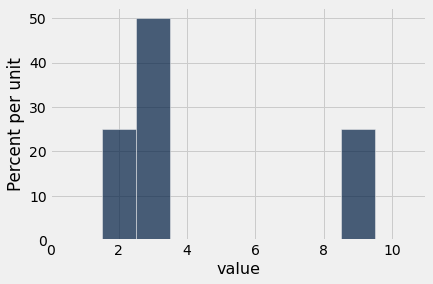

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [ ]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

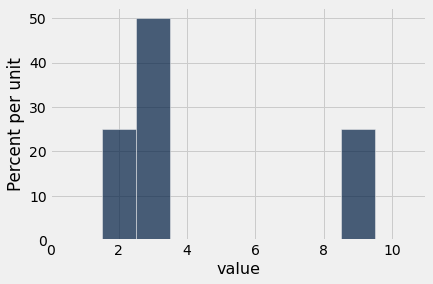

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [ ]:
np.average(values)

4.25

In [ ]:
np.average(new_vals)

4.25

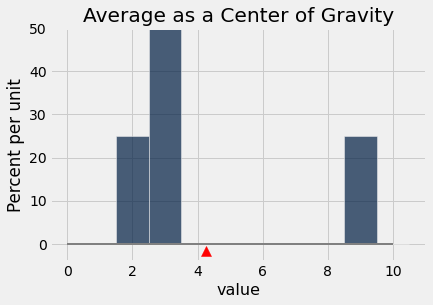

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)
plots.ylim(-0.04, 0.5)
plots.plot([0, 10], [0, 0], color='grey', lw=2)
plots.scatter(np.average(new_vals), -0.015, marker='^', color='red', s=100)
plots.title('Average as a Center of Gravity');

In [ ]:
vals1 = make_array(1, 2, 2, 3, 3, 3, 4, 4, 5)
vals2 = make_array(1, 2, 2, 3, 3, 3, 4, 4, 10)

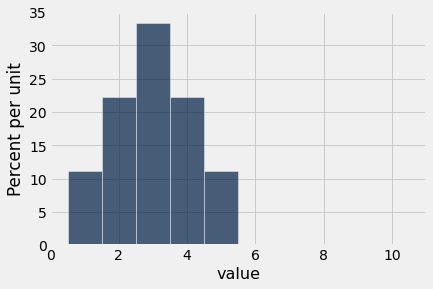

In [ ]:
bins_for_display1 = np.arange(0.5, 11.6, 1)
Table().with_column('value', vals1).hist(bins=bins_for_display)

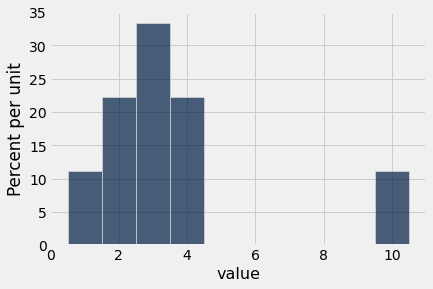

In [ ]:
Table().with_column('value', vals2).hist(bins=bins_for_display)

In [ ]:
percentile(50, vals1), percentile(50, vals2)

(3, 3)

In [ ]:
np.average(vals1), np.average(vals2)

(3.0, 3.5555555555555554)

## **Standard Deviation**

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [ ]:
average_value = np.mean(values)
average_value

4.25

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [ ]:
sum(deviations)

0.0

In [ ]:
sd_table = sd_table.with_column('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [ ]:
# Variance of the data:
# mean squared deviation from average

variance = np.mean(deviations ** 2)
variance

7.6875

In [ ]:
# Standard Deviation (SD): 
# root mean squared deviation from average
# = square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [ ]:
np.std(values)

2.7726341266023544

## **Chebyshev's Bounds**

In [ ]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')

In [ ]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

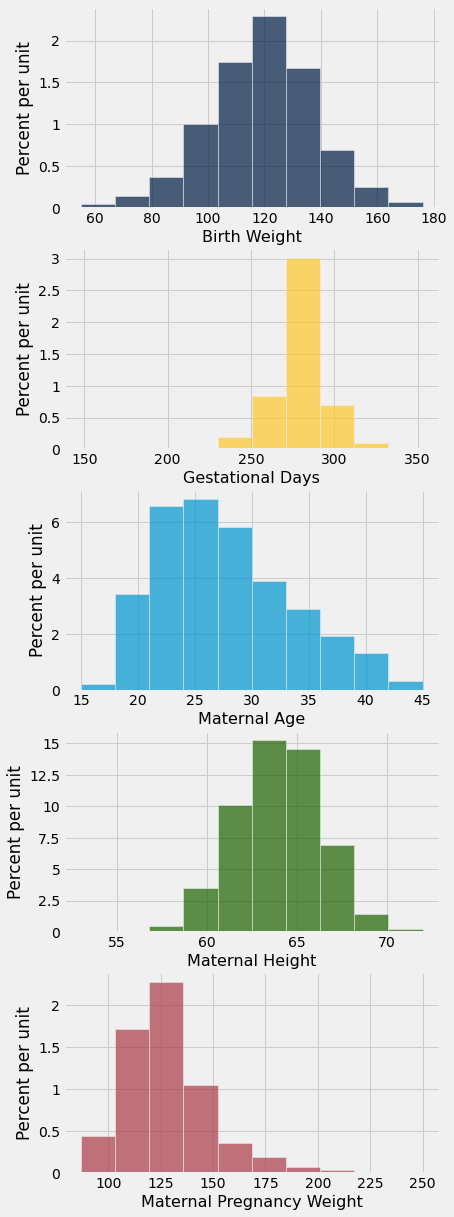

In [ ]:
births.hist(overlay = False)

In [ ]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [ ]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [ ]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [ ]:
# Chebyshev's bound: 
# This proportion should be at least

1 - 1/3**2

0.8888888888888888

In [ ]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [ ]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        chebyshev = (1 - 1/z**2) * 100
        print('Average plus or minus', z, 'SDs:', percent, '%', 
              "   (vs. Chebyshev's:", chebyshev, '%)')


Birth Weight
Average plus or minus 2 SDs: 94.89 %    (vs. Chebyshev's: 75.0 %)
Average plus or minus 3 SDs: 99.57 %    (vs. Chebyshev's: 88.8888888889 %)
Average plus or minus 4 SDs: 100.0 %    (vs. Chebyshev's: 93.75 %)
Average plus or minus 5 SDs: 100.0 %    (vs. Chebyshev's: 96.0 %)

Gestational Days
Average plus or minus 2 SDs: 93.78 %    (vs. Chebyshev's: 75.0 %)
Average plus or minus 3 SDs: 98.64 %    (vs. Chebyshev's: 88.8888888889 %)
Average plus or minus 4 SDs: 99.57 %    (vs. Chebyshev's: 93.75 %)
Average plus or minus 5 SDs: 99.83 %    (vs. Chebyshev's: 96.0 %)

Maternal Age
Average plus or minus 2 SDs: 94.89 %    (vs. Chebyshev's: 75.0 %)
Average plus or minus 3 SDs: 99.91 %    (vs. Chebyshev's: 88.8888888889 %)
Average plus or minus 4 SDs: 100.0 %    (vs. Chebyshev's: 93.75 %)
Average plus or minus 5 SDs: 100.0 %    (vs. Chebyshev's: 96.0 %)

Maternal Height
Average plus or minus 2 SDs: 97.19 %    (vs. Chebyshev's: 75.0 %)
Average plus or minus 3 SDs: 99.66 %    (vs. Cheb

## **Standard Units**

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [ ]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [ ]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

## **Discussion Question**

In [ ]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [ ]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

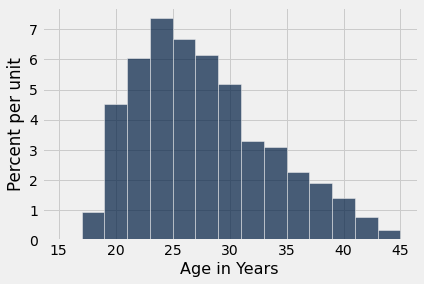

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

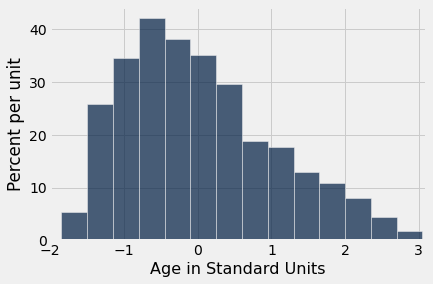

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## **The SD and Bell Shaped Curves**

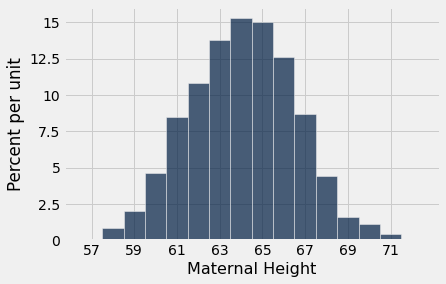

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

Estimates by eye

The average is approximately: 

Locate the point of inflection on the right. The SD is approximately:

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

(66.574429188837968, 61.524378306903088)